<a href="https://colab.research.google.com/github/KARTIKPARATKAR/DEEP-LEARNING-WORK/blob/main/CNN_Architecture(LeNet).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**CNN Architecture-**

We have convolutional layer,padding and strides and pooling layer.

How a simple CNN architecture looks like that we will see now.

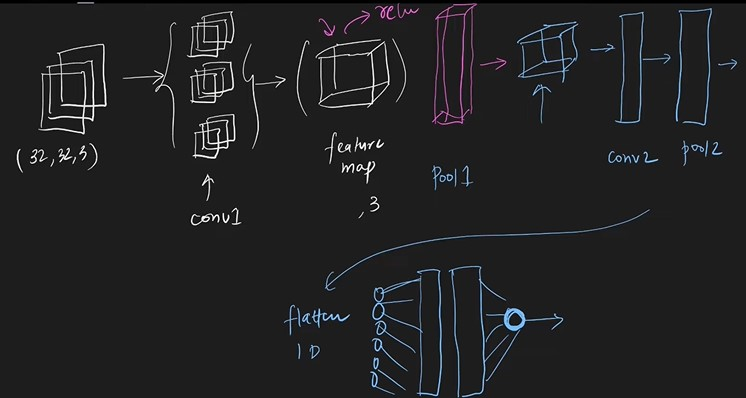

Let we have a image of 32 * 32 * 3 which is an RGB image.This image wil be passed through convolution layer.There will be filters present in convolution layer, let we have 3 filters(3-channels) in convolution layer.This is the conv layer 1. We will get the feature map as output of 1st conv layer.We apply relu activation function on feature map to introduce the non-linearity in feature map.Now we pass this non-linear feature map into pooling layer which gives us some tensor.Now we can apply again convolution on this tensor and then again pooling layer . We can do this as much times we want.At the end we will be having the final tensor. We apply flatten layer to this tensor which means we convert the tensor into 2 dimensions from 3 dimensions. Now we apply fully connected layer like ANN.e can add multiple fully connected layer. We will have an output layer with activation function according to the problem we are solving.And we get the output.

So this is the basic of CNN architecture.We change the no of convolution layers,no of filters in convolution layer,what is stride value, is there padding considered or not,how many nodes in fully connected layer,no of fully connected layers , which activation function is used , batch normalization is used or not,dropout is considered or not.By changing all these parameters we can define different CNN architectures.


Different types of Famous CNN architectures-

* LeNet

* AlexNet

* GoogleNet

* VggNet

* ResNet

* Inception etc.

**LeNet-**


Yann LeCun created the architecture of LeNet in 1989.LeNet is also known as LeNet-5 becuse it has 5 layers.LeNet is the first CNN model whoch LeNet takes 32 * 32 input, we pass it through the convolution layer having 6 filters.Size of filter is 5 * 5 . There is average pooling layer with recpting field of 2 * 2 and stride of 2. Then again convolution layer having 16 filters of 5 * 5 size and average pooling with recpting field of 2 * 2 having stride of 2. Then there is a flatten layer which gives us 1 D tensor.This 1D tensor is passed through fully connected layer of 129 neurons.Again there is fully connected layer having 84 neurons and at the end there is softmax layer as output so as to classify the different digits.

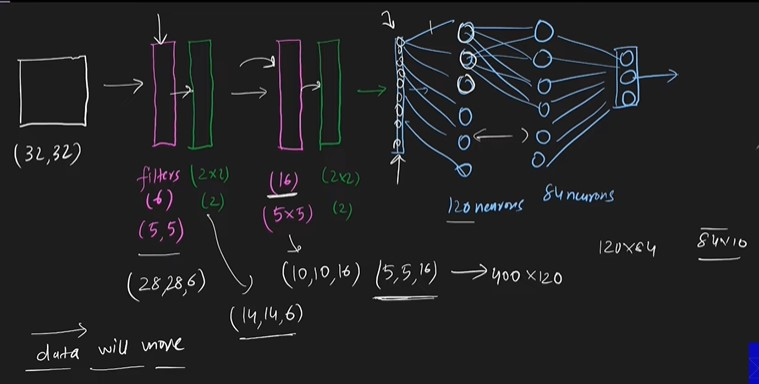

**Now we will try to implement LeNet in tensorflow**

In [1]:
import tensorflow
from tensorflow import keras
from keras.layers import Dense,Conv2D,Flatten,AveragePooling2D
from keras import Sequential
from keras.datasets import mnist

In [2]:
(x_train,y_train),(x_test,y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [6]:
#Now implementing the LeNet architecture
#ONe thing to notice here is that the activation function
#throughout the architecture is tanh only
model = Sequential()
model.add(Conv2D(6,kernel_size=(5,5),padding='valid',activation = 'tanh',input_shape=(32,32,1)))
model.add(AveragePooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(16,kernel_size=(5,5),padding='valid',activation = 'tanh'))
model.add(AveragePooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(120,activation='tanh'))
model.add(Dense(84,activation='tanh'))
model.add(Dense(10,activation='softmax'))


In [7]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)                    │ (None, 28, 28, 6)           │             156 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ average_pooling2d_1                  │ (None, 14, 14, 6)           │               0 │
│ (AveragePooling2D)                   │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 10, 10, 16)          │           2,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ average_pooling2d_2                  │ (None, 5, 5, 16)            │               0 │
│ (AveragePooling2D)                   │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 400)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 120)                 │          48,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 84)                  │          10,164 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │             850 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 61,706 (241.04 KB)

 Trainable params: 61,706 (241.04 KB)

 Non-trainable params: 0 (0.00 B)